In [4]:
import torch
import torch.nn as nn
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
import io
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader
from keras import initializers
from keras.models import load_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Input, Dropout
from tensorflow.keras import layers
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU
from numpy.random import seed

In [5]:
pressure = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\pressure.csv')
pressure.iloc[:5]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [6]:
data = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\city_attributes.csv')
data

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


In [7]:
data.dtypes

City          object
Country       object
Latitude     float64
Longitude    float64
dtype: object

In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
dtype: bool

In [9]:
data['Country'].unique()

array(['Canada', 'United States', 'Israel'], dtype=object)

In [10]:
data['City'].unique().size

36

In [16]:
data2 = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\humidity.csv')
humidity

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
humidity.shape

(45253, 37)

In [15]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          43427 non-null  float64
 2   Portland           44804 non-null  float64
 3   San Francisco      44311 non-null  float64
 4   Seattle            44964 non-null  float64
 5   Los Angeles        45101 non-null  float64
 6   San Diego          44909 non-null  float64
 7   Las Vegas          44411 non-null  float64
 8   Phoenix            43945 non-null  float64
 9   Albuquerque        44543 non-null  float64
 10  Denver             43445 non-null  float64
 11  San Antonio        44689 non-null  float64
 12  Dallas             44934 non-null  float64
 13  Houston            45132 non-null  float64
 14  Kansas City        44741 non-null  float64
 15  Minneapolis        44743 non-null  float64
 16  Saint Louis        439

In [17]:
data2.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
5,2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0
6,2012-10-01 18:00:00,78.0,79.0,83.0,78.0,88.0,80.0,21.0,24.0,49.0,...,68.0,56.0,76.0,68.0,55.0,63.0,23.0,51.0,51.0,50.0
7,2012-10-01 19:00:00,79.0,78.0,82.0,77.0,88.0,80.0,21.0,24.0,49.0,...,68.0,56.0,72.0,68.0,56.0,63.0,23.0,51.0,51.0,50.0
8,2012-10-01 20:00:00,79.0,78.0,81.0,77.0,88.0,79.0,20.0,25.0,49.0,...,67.0,56.0,68.0,68.0,57.0,63.0,24.0,51.0,51.0,50.0
9,2012-10-01 21:00:00,80.0,77.0,80.0,76.0,88.0,79.0,20.0,25.0,49.0,...,67.0,55.0,64.0,68.0,58.0,64.0,24.0,51.0,51.0,50.0


In [18]:
data2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45248    False
45249    False
45250    False
45251    False
45252    False
Length: 45253, dtype: bool

In [19]:
data2.isnull().sum()

datetime                0
Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [20]:
data2.dropna(inplace=True)

In [21]:
data2.isnull().sum()

datetime             0
Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [22]:
data2.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
5,2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


In [23]:
data2.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,...,36263.000000,36263.00000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000,36263.000000
mean,82.453961,74.391032,77.730552,77.985633,63.048286,68.271048,32.978877,38.317734,47.747401,53.841298,...,69.029203,67.59904,72.484516,78.707994,72.250503,66.960924,53.483275,80.748366,79.523205,70.438188
std,14.314008,19.215405,17.525858,18.371337,21.652352,19.395182,20.615643,21.942705,23.331623,23.485589,...,18.325127,19.69876,16.559053,18.331336,20.491696,16.526354,27.712399,23.704499,24.099904,18.553584
min,12.000000,10.000000,6.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,10.000000,10.00000,7.000000,11.000000,8.000000,5.000000,5.000000,6.000000,6.000000,5.000000
25%,74.000000,62.000000,68.000000,66.000000,49.000000,56.000000,17.000000,22.000000,28.000000,34.000000,...,55.000000,52.00000,61.000000,67.000000,56.000000,57.000000,31.000000,64.000000,62.000000,58.000000
50%,86.000000,78.000000,82.000000,81.000000,66.000000,71.000000,28.000000,33.000000,45.000000,53.000000,...,69.000000,69.00000,74.000000,82.000000,79.000000,69.000000,47.000000,94.000000,93.000000,72.000000
75%,93.000000,90.000000,91.000000,93.000000,81.000000,82.000000,45.000000,51.000000,67.000000,74.000000,...,85.000000,83.00000,86.000000,93.000000,89.000000,78.000000,76.000000,100.000000,100.000000,85.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [24]:
data2['datetime'] = pd.to_datetime(data2['datetime'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36263 entries, 1 to 44460
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           36263 non-null  datetime64[ns]
 1   Vancouver          36263 non-null  float64       
 2   Portland           36263 non-null  float64       
 3   San Francisco      36263 non-null  float64       
 4   Seattle            36263 non-null  float64       
 5   Los Angeles        36263 non-null  float64       
 6   San Diego          36263 non-null  float64       
 7   Las Vegas          36263 non-null  float64       
 8   Phoenix            36263 non-null  float64       
 9   Albuquerque        36263 non-null  float64       
 10  Denver             36263 non-null  float64       
 11  San Antonio        36263 non-null  float64       
 12  Dallas             36263 non-null  float64       
 13  Houston            36263 non-null  float64       
 14  Kansas

In [25]:
data2.nlargest(1,'Vancouver')
# "nlargest helps to find the row with the largest value for a specified column"

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
361,2012-10-16 13:00:00,100.0,87.0,93.0,87.0,63.0,52.0,71.0,34.0,49.0,...,72.0,77.0,82.0,77.0,54.0,69.0,24.0,69.0,69.0,47.0


In [26]:
# replacing the statements with values analyse the dataset
weather = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\weather_description.csv')
BsmtQual = {'heavy shower snow': 0, 'heavy snow': 0, 'light shower snow': 1, 'light snow': 1, 'shower snow': 2, 'sleet': 2, 'light rain and snow': 2, ' light shower sleet': 2, 
            'fog': 3, 'haze':3, 'mist': 3, 'thunderstorm with heavy rain': 5, 'heavy intensity shower rain': 5, 'thunderstorm with rain': 5, 'very heavy rain': 5, 
            'ragged thunderstorm': 6, 'proximity thunderstorm': 6, 'smoke': 6, 'moderate rain': 6, 'heavy intensity rain': 6, 'thunderstorm with light rain': 6, 
            'shower rain': 7, 'thunderstorm': 7, 'proximity shower rain': 7, 'light intensity drizzle rain': 8, 'light intensity drizzle': 8, ' volcanic ash': 8, 
            'dust': 8, 'overcast clouds': 10, 'light intensity shower rain': 6, 'light rain': 7, 'broken clouds': 11, 'scattered clouds': 11,'few clouds': 11, 'sky is clear': 13}
for i in weather.columns.tolist():
    weather[i] = weather[i].map(BsmtQual)
weather.iloc[:5]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1,NaN,3.0,11.0,7.0,13.0,3.0,13.0,13.0,13.0,13.0,...,11.0,11.0,10.0,13.0,13.0,13.0,3.0,13.0,13.0,13.0
2,NaN,11.0,11.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,11.0,11.0,13.0,11.0,13.0,13.0,11.0,10.0,13.0,10.0
3,NaN,11.0,11.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,11.0,11.0,13.0,11.0,10.0,13.0,11.0,10.0,10.0,10.0
4,NaN,11.0,11.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,11.0,11.0,13.0,11.0,10.0,13.0,11.0,10.0,10.0,10.0


In [27]:
windSpeed = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\wind_speed.csv')
windSpeed.iloc[:5]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


In [35]:
print(data.shape) # it represents cities
print(data2.shape)  # data2 represents the humidity dataframe
print(pressure.shape)
print(temperature.shape)
print(weather.shape)
print(windSpeed.shape)

(36, 4)
(36263, 37)
(45253, 36)
(45253, 36)
(45253, 36)
(45253, 36)


In [36]:
temperature = temperature - 273.15
temperature

,VancouverT,PortlandT,San FranciscoT,SeattleT,Los AngelesT,San DiegoT,Las VegasT,PhoenixT,AlbuquerqueT,DenverT,...,PhiladelphiaT,New YorkT,MontrealT,BostonT,BeershebaT,Tel Aviv DistrictT,EilatT,HaifaT,NahariyyaT,JerusalemT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
1,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
3,11.476998,8.941866,16.310618,8.639833,18.712844,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697790,14.081672,34.241513,31.131841,37.261538,31.25,31.25,30.35
4,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700440,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,8.850000,NaN,7.670000,20.400000,19.000000,16.390000,21.560000,12.570000,16.410000,...,17.090000,NaN,1.980000,14.930000,NaN,NaN,NaN,NaN,NaN,NaN
45249,NaN,9.740000,NaN,8.500000,22.530000,19.590000,17.460000,22.440000,13.300000,17.550000,...,16.090000,NaN,0.980000,12.870000,NaN,NaN,NaN,NaN,NaN,NaN
45250,NaN,10.240000,NaN,9.600000,22.810000,19.430000,18.190000,23.100000,13.290000,16.560000,...,13.630000,NaN,0.330000,10.790000,NaN,NaN,NaN,NaN,NaN,NaN
45251,NaN,9.870000,NaN,9.810000,22.500000,19.460000,19.000000,24.000000,12.990000,16.020000,...,11.420000,NaN,-0.670000,9.020000,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Use a raw string for the file path or double backslashes
temperature = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\temperature.csv', parse_dates=['datetime'])

In [39]:
if 'datetime' in humidity.columns:
    del humidity['datetime']
    humidity = humidity.rename(columns=lambda x: x + 'H')
else:
    print("The 'datetime' column does not exist in the humidity DataFrame.")

if 'datetime' in pressure.columns:
    del pressure['datetime']
    pressure = pressure.rename(columns=lambda x: x + 'P')
else:
    print("The 'datetime' column does not exist in the pressure DataFrame.")

if 'datetime' in temperature.columns:
    del temperature['datetime']
    temperature = temperature.rename(columns=lambda x: x + 'T')
else:
    print("The 'datetime' column does not exist in the temperature DataFrame.")

if 'datetime' in weather.columns:
    del weather['datetime']
    weather = weather.rename(columns=lambda x: x + 'W')
else:
    print("The 'datetime' column does not exist in the weather DataFrame.")

if 'datetime' in windSpeed.columns:
    del windSpeed['datetime']
    windSpeed = windSpeed.rename(columns=lambda x: x + 'Wd')
else:
    print("The 'datetime' column does not exist in the windSpeed DataFrame.")

The 'datetime' column does not exist in the humidity DataFrame.
The 'datetime' column does not exist in the pressure DataFrame.
The 'datetime' column does not exist in the temperature DataFrame.
The 'datetime' column does not exist in the weather DataFrame.
The 'datetime' column does not exist in the windSpeed DataFrame.


In [40]:
allData = pd.concat([humidity, pressure, temperature, weather], axis = 1)
allData = allData.iloc[37000:42000].reset_index()
# Resetting the index of all the rows from 37000 to 41999 to cope up with the dropped rows
del allData['index']
allData

,VancouverH,PortlandH,San FranciscoH,SeattleH,Los AngelesH,San DiegoH,Las VegasH,PhoenixH,AlbuquerqueH,DenverH,...,PhiladelphiaW,New YorkW,MontrealW,BostonW,BeershebaW,Tel Aviv DistrictW,EilatW,HaifaW,NahariyyaW,JerusalemW
0,81.0,86.0,58.0,81.0,15.0,25.0,19.0,47.0,58.0,41.0,...,13.0,13.0,10.0,3.0,10.0,13.0,13.0,10.0,10.0,13.0
1,86.0,93.0,62.0,81.0,16.0,39.0,30.0,41.0,63.0,36.0,...,13.0,13.0,10.0,11.0,10.0,13.0,13.0,11.0,11.0,13.0
2,86.0,93.0,62.0,86.0,15.0,34.0,30.0,47.0,63.0,45.0,...,13.0,13.0,10.0,10.0,10.0,13.0,13.0,11.0,11.0,13.0
3,75.0,93.0,61.0,93.0,16.0,48.0,30.0,44.0,58.0,34.0,...,13.0,13.0,10.0,10.0,10.0,13.0,13.0,11.0,11.0,13.0
4,81.0,100.0,57.0,93.0,17.0,59.0,28.0,50.0,54.0,42.0,...,13.0,13.0,10.0,13.0,10.0,13.0,13.0,11.0,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,73.0,67.0,88.0,82.0,88.0,93.0,24.0,78.0,46.0,40.0,...,13.0,3.0,11.0,11.0,13.0,13.0,13.0,11.0,11.0,13.0
4996,77.0,67.0,94.0,76.0,88.0,83.0,24.0,74.0,49.0,45.0,...,13.0,3.0,11.0,10.0,13.0,13.0,13.0,13.0,13.0,13.0
4997,88.0,67.0,88.0,87.0,78.0,93.0,29.0,78.0,52.0,52.0,...,13.0,3.0,11.0,8.0,13.0,13.0,13.0,13.0,13.0,13.0
4998,93.0,72.0,88.0,93.0,77.0,93.0,26.0,65.0,55.0,63.0,...,3.0,3.0,3.0,3.0,13.0,13.0,13.0,11.0,11.0,13.0


In [41]:
allDataNa = allData.isnull().sum()
# Getting the count of missing value in each column
allDataNA = allDataNa.drop(allDataNa[allDataNa == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :allDataNa})
missing_data.iloc[0:5]
# This step is done to get the columns with missing values in descending order of the number of missing values in that particular column

,Missing Ratio
VancouverH,1
PortlandH,0
San FranciscoH,0
SeattleH,0
Los AngelesH,0


In [42]:
allDataNa.shape

(144,)

In [43]:
# using forward fill and backward fill method to fill-in the columns with missing values
# used only when the dataset has a time component in it
allData = allData.fillna(method='ffill')
allData = allData.fillna(method='bfill')
allDataNa = allData.isnull().sum()
allDataNA = allDataNa.drop(allDataNa[allDataNa == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :allDataNa})
missing_data.iloc[0:5]

,Missing Ratio
VancouverH,0
PortlandH,0
San FranciscoH,0
SeattleH,0
Los AngelesH,0


In [44]:
trainData, testData = train_test_split(allData, test_size = 0.2, random_state = 42, shuffle = False)

In [45]:
trainData = trainData.reset_index()
del trainData['index']
testData = testData.reset_index()
del testData['index']

In [46]:
trainDataX = trainData.drop(['VancouverT'], axis = 1)
trainDataY = trainData['VancouverT']
testDataX = testData.drop(['VancouverT'], axis = 1)
testDataY = testData['VancouverT']

In [47]:
trainDataX.columns

Index(['VancouverH', 'PortlandH', 'San FranciscoH', 'SeattleH', 'Los AngelesH',
       'San DiegoH', 'Las VegasH', 'PhoenixH', 'AlbuquerqueH', 'DenverH',
       ...
       'PhiladelphiaW', 'New YorkW', 'MontrealW', 'BostonW', 'BeershebaW',
       'Tel Aviv DistrictW', 'EilatW', 'HaifaW', 'NahariyyaW', 'JerusalemW'],
      dtype='object', length=143)

In [48]:
mean = trainDataX.mean(axis=0)
std = trainDataX.std(axis=0)

trainDataXN = (trainDataX - mean)/std
testDataXN = (testDataX - mean)/std

In [49]:
# Assuming trainDataX is the original training data
scaler = StandardScaler()
trainDataXScal = scaler.fit_transform(trainDataX)
"""StandardScaler from scikit-learn to standardize the features in the trainDataX DataFrame. 
Standardization involves transforming the data to have a mean of 0 and a standard deviation of 1.
The fit_transform method is used to compute the mean and standard deviation of each feature in the 
training data (trainDataX) and then standardize the data.The resulting trainDataXScal is the standardized 
version of the original training data, where each feature now has a mean of 0 and a standard deviation of 1."""

'StandardScaler from scikit-learn to standardize the features in the trainDataX DataFrame. \nStandardization involves transforming the data to have a mean of 0 and a standard deviation of 1.\nThe fit_transform method is used to compute the mean and standard deviation of each feature in the \ntraining data (trainDataX) and then standardize the data.The resulting trainDataXScal is the standardized \nversion of the original training data, where each feature now has a mean of 0 and a standard deviation of 1.'

In [50]:
trainDataXScal.shape

(4000, 143)

In [51]:
# Performing principle component analysis to reduce the dimensionality and noise in the dataset because of large number of features in the dataset
pcaX = PCA(n_components = 15)
"This creates a PCA object specifying that you want to reduce the data to 15 principal components"

pcaX.fit(trainDataXScal)
"The PCA model is fitted to the standardized training data, and it computes the principal components"

trainDataXP = pd.DataFrame(pcaX.transform(trainDataX))
testDataXP = pd.DataFrame(pcaX.transform(testDataX))
"""The transform method is used to project the original data onto the new principal components. 
The resulting trainDataXP and testDataXP DataFrames contain the transformed data"""

sum((pcaX.explained_variance_ratio_[i] for i in range(0, len(pcaX.explained_variance_ratio_))))
"The explained variance ratio represents the proportion of the dataset's variance that lies along each principal component"

C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


"The explained variance ratio represents the proportion of the dataset's variance that lies along each principal component"

In [52]:
# Performing feature selection to optimize the computation time and incearse accuracy
"""Feature selection is performed to select only those features which help in defining the model and removing the
unnecessary features from the dataset which in-turn reduces the noise and improves the model's quality"""

fSelect = SelectPercentile(f_regression, percentile = 15)
# selecting only those top 15 % of features that can strongly determine the model

fSelect.fit(trainDataXScal, trainDataY)
# fitting trainData X & Y in the feature selection model

trainFData = pd.DataFrame(fSelect.transform(trainDataXN))
testFData = pd.DataFrame(fSelect.transform(testDataXN))

C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectPercentile was fitted without feature names
  warnings.warn(
C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectPercentile was fitted without feature names
  warnings.warn(


In [53]:
trainFData.shape
testFData.shape

(1000, 22)

In [54]:
# Combining the dataframe obtained from both, pca anf f-selection to make the final model robust
trainDataXCor = pd.concat([trainDataXP, trainFData], axis = 1)
testDataXCor = pd.concat([testDataXP, testFData], axis = 1)

In [55]:
trainDataXCor.shape

(4000, 37)

<Axes: >

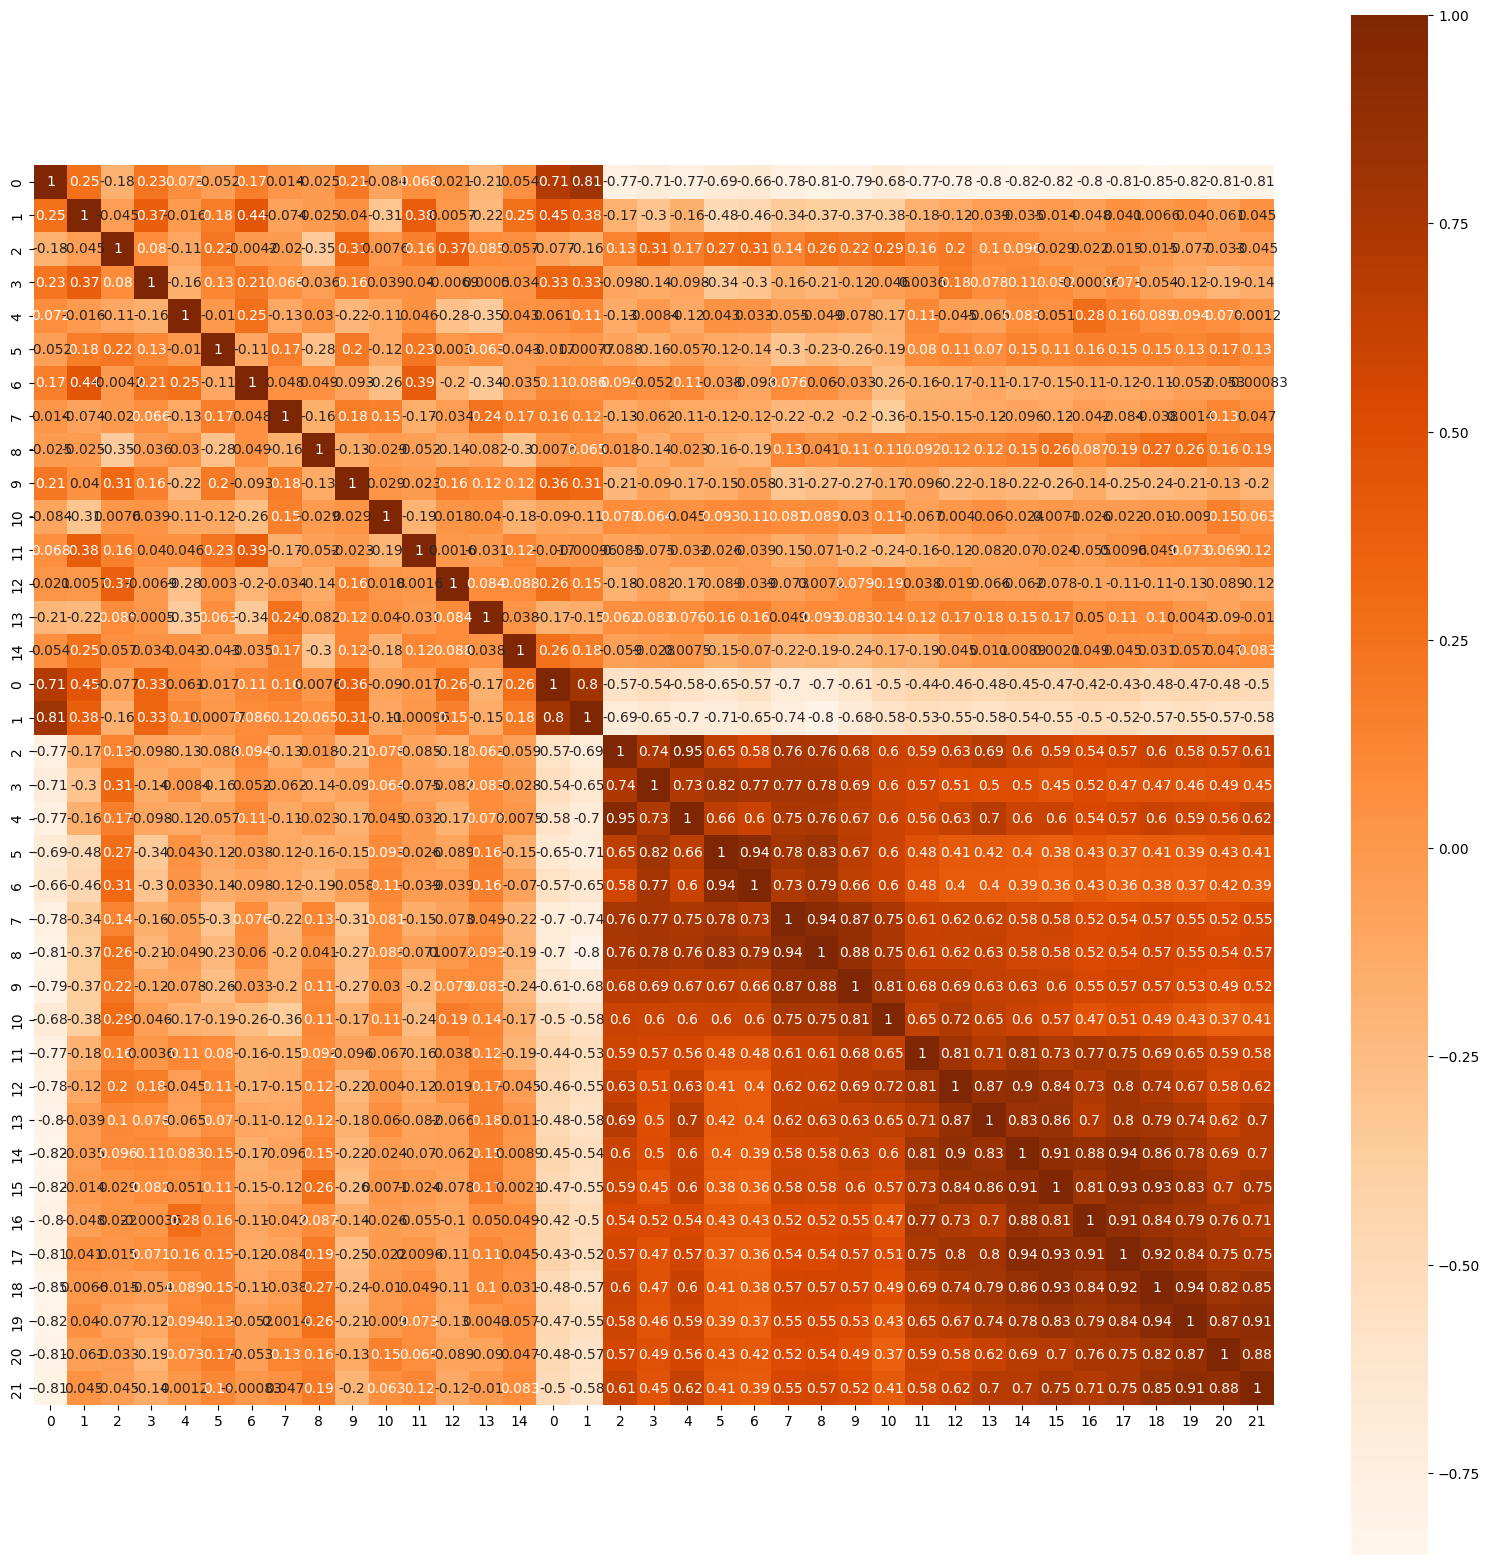

In [56]:
correlation = trainDataXCor.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'Oranges')

In [106]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 30 == 0: print('')
        print('.', end = '')

In [113]:
"DIDN'T UNDERSTAND"
seed(1)
"Sets the random seed for NumPy random number generator to a specific value, in this case, 1"
"""Setting the seed ensures that the random numbers generated by NumPy are the same
every time the code is run. This is crucial for reproducibility in machine learning experiments"""

tf.compat.v1.set_random_seed(1)
"It sets the random seed for TensorFlow to the same value, 1"

In [114]:
def crossValdation(modelTF, dataSet, arg, printD):
    trainDataX = trainData.drop([arg], axis = 1)
    trainDataY = trainData[arg]
    epohs = 200
    batch = 100
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
#   monitors the validation loss and stops training if the loss does not improve for a certain number of epochs
    histMean = pd.DataFrame({'loss':[], 'mse':[], 'mae':[], 'val_loss':[], 'val_mse':[], 'val_mae':[], 'epoch':[]})
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
#     loop to split the dataset
    for trainIndex, validIndex in skf.split(trainDataX, trainDataY.astype(int)):
        trainX = trainDataX.iloc[trainIndex]
        trainY = trainDataY.iloc[trainIndex]
        validX = trainDataX.iloc[validIndex]
        validY = trainDataY.iloc[validIndex]
        modelG = modelTF(trainX.shape[1])
        history = modelG.fit(trainX, trainY, validation_data = (validX, validY), batch_size = batch, epochs = epohs, verbose = 0, callbacks = [early_stop, printD])
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
        histMean = histMean.append(hist.iloc[[-1]], ignore_index = True)
    
    del histMean['epoch']    
    tir = pd.DataFrame({'loss':['---'], 'mse':['---'], 'mae':['---'], 'val_loss':['---'], 'val_mse':['---'], 'val_mae':['---']})
    histM = pd.DataFrame(histMean.mean()).T
    histMean = histMean.append(tir)
    histMean = histMean.append(histM)
    return histMean, modelG, hist

In [ ]:
"""Stratified K-Fold Cross-Validation is a technique used for model evaluation, 
especially in the context of classification problems, where the goal is to predict categorical outcomes
(e.g., classes or labels). In this technique, the dataset is divided into K folds, and each fold is made by
preserving the percentage of samples for each class.

Here's a breakdown of the key concepts:

Stratification:

Objective: Maintain the same distribution of target classes in each fold as in the entire dataset.
Benefit: Ensures that each fold is representative of the overall class distribution, which can be crucial 
for imbalanced datasets.
K-Fold Cross-Validation:

Objective: Divide the dataset into K subsets (folds) for training and testing.
Process:
The dataset is divided into K subsets.
The model is trained K times, each time using K-1 folds for training and the remaining fold for testing.
The performance metrics are averaged over the K iterations to obtain a more robust evaluation.
Stratified K-Fold:

Objective: Combine the benefits of stratification and K-Fold Cross-Validation.
Process:
The dataset is divided into K subsets, ensuring that each subset has the same distribution of target classes.
The model is trained K times, using each subset as a testing set exactly once.
Performance metrics are averaged over the K iterations.
Here's an example scenario: Suppose you're building a classification model to predict whether an email is spam or not.
Stratified K-Fold ensures that each fold has a similar proportion of spam and non-spam emails as the entire dataset.

In the code you provided, the StratifiedKFold is configured with 5 folds (n_splits=5), shuffling the data, and setting 
a random seed for reproducibility (random_state=1). This cross-validator is then used to split the data into training 
and validation sets for multiple iterations, ensuring that each split maintains a balanced distribution of target classes."""

In [176]:
def createModelG(inputShape):
    model = Sequential()
    model.add(Dense(4096, input_dim = inputShape, 
                    kernel_initializer = initializers.glorot_uniform(seed = 1), 
                    kernel_regularizer = keras.regularizers.l2(0.01), activation = "relu")) 
    model.add(Dense(2048, 
                    kernel_initializer = initializers.glorot_uniform(seed = 1), activation = "relu"))
    model.add(Dense(2048, 
                    kernel_initializer = initializers.glorot_uniform(seed = 1), activation = "relu"))
    model.add(Dense(1024, 
                    kernel_initializer = initializers.glorot_uniform(seed = 1), activation = "relu"))
    model.add(Dense(1024, 
                    kernel_initializer = initializers.glorot_uniform(seed = 1), activation = "relu"))
    model.add(layers.Dropout(0.05))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000001)
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ["mse", "mae"])
    return model

In [ ]:
"""It aims to set the initial weights of the neurons in a way that avoids the vanishing or exploding gradient
problems during training.

The formula for Glorot uniform initialization is as follows:

limit = sqrt(6/(fan_in+fan_out))

Here:

fan_in is the number of input units in the weight tensor.
fan_out is the number of output units in the weight tensor.
The weights are then initialized from a uniform distribution in the range [−limit,limit].

In practice, Glorot uniform initialization is commonly used for sigmoid and hyperbolic tangent (tanh)
activation functions. It helps in preventing saturation of these activation functions and facilitates 
better training convergence."""

In [116]:
startModelTest = crossValdation(createModelG, trainDataXCor, 'VancouverT', PrintDot())
modelTest = startModelTest[1]
hist = startModelTest[2]
startModelTest[0]

C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



..............................
..............................
............................

C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(hist.iloc[[-1]], ignore_index = True)



..............................
..............................
..............................
.......

C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(hist.iloc[[-1]], ignore_index = True)



..............................
.................

C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(hist.iloc[[-1]], ignore_index = True)



..............................
..............................
..............................
............................

C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(hist.iloc[[-1]], ignore_index = True)



..............................
..............................
..............................
..............................
........

C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(hist.iloc[[-1]], ignore_index = True)
C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(tir)
C:\Users\Arin\AppData\Local\Temp\ipykernel_28960\3349078616.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  histMean = histMean.append(histM)


,loss,mse,mae,val_loss,val_mse,val_mae
0,11.592546,9.092406,2.391315,9.285611,6.786874,2.043169
1,15.409859,12.933425,2.856418,10.004477,7.529423,2.264479
2,18.017235,15.400585,3.128657,11.246466,8.631346,2.289251
3,11.223733,8.802279,2.371119,7.750056,5.329924,1.816228
4,9.026246,6.631527,2.041303,7.275526,4.88211,1.744804
0,---,---,---,---,---,---
0,13.053924,10.572045,2.557762,9.112427,6.631935,2.031586


In [265]:
model1 = createModelG(143)
model1.save('C:\College Material\Techno Hacks\weather_prediction_model\ml_model\my_model.h5')
tf.random.set_seed(1)
loaded_model = load_model('C:\College Material\Techno Hacks\weather_prediction_model\ml_model\my_model.h5')

In [266]:
"""Giving significantly high error when using the loaded model"""
# Make predictions using the loaded model
loaded_pred = loaded_model.predict(testDataX).flatten()

# Calculate the mean absolute error
loaded_difference = loaded_pred - testDataY.values
loaded_mae = sum(abs(loaded_difference)) / len(loaded_difference)

print("Original Model MAE:", sum(abs(difference))/len(difference))
print("Loaded Model MAE:", loaded_mae)

32/32 [==============================] - 1s 15ms/step
Original Model MAE: 1.5953104516124517
Loaded Model MAE: 74.233735759512


In [262]:
pred = modelTest.predict(testDataX).flatten()
difference = pred - testDataY.values
print(sum(abs(difference))/len(difference))

32/32 [==============================] - 1s 16ms/step
1.5953104516124517


In [190]:
pred.shape

(1000,)

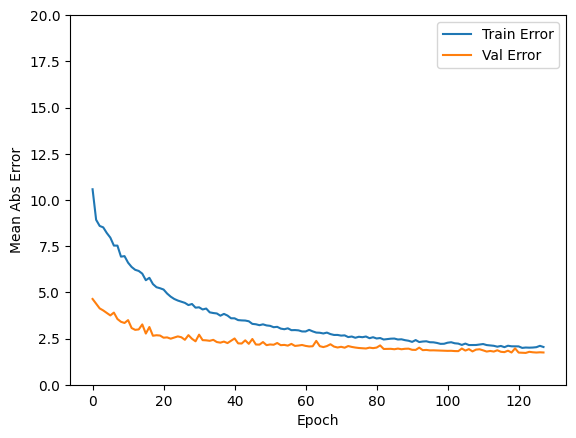

In [268]:
# plot for original model
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,20])

plot_history()

In [119]:
for i in range(0, 1000, 50):
    print("Predicted Temperature: ", round(pred[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))

Predicted Temperature:  18.265 , Correct Temperature:  17.36
Predicted Temperature:  18.944 , Correct Temperature:  24.04
Predicted Temperature:  16.934 , Correct Temperature:  16.75
Predicted Temperature:  19.026 , Correct Temperature:  20.63
Predicted Temperature:  16.099 , Correct Temperature:  14.81
Predicted Temperature:  14.38 , Correct Temperature:  14.77
Predicted Temperature:  15.003 , Correct Temperature:  13.17
Predicted Temperature:  14.431 , Correct Temperature:  13.82
Predicted Temperature:  12.456 , Correct Temperature:  9.59
Predicted Temperature:  15.246 , Correct Temperature:  14.49
Predicted Temperature:  14.584 , Correct Temperature:  18.02
Predicted Temperature:  15.703 , Correct Temperature:  15.83
Predicted Temperature:  18.828 , Correct Temperature:  21.27
Predicted Temperature:  19.76 , Correct Temperature:  20.65
Predicted Temperature:  20.831 , Correct Temperature:  23.83
Predicted Temperature:  21.356 , Correct Temperature:  24.33
Predicted Temperature:  17.

In [120]:
reg = LinearRegression().fit(trainDataXN, trainDataY)
predL = reg.predict(testDataXN)
for i in range(0, 1000, 100):
    print("Predicted Temperature: ", round(predL[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))

Predicted Temperature:  18.448 , Correct Temperature:  17.36
Predicted Temperature:  14.892 , Correct Temperature:  16.75
Predicted Temperature:  15.032 , Correct Temperature:  14.81
Predicted Temperature:  13.899 , Correct Temperature:  13.17
Predicted Temperature:  11.201 , Correct Temperature:  9.59
Predicted Temperature:  16.275 , Correct Temperature:  18.02
Predicted Temperature:  20.633 , Correct Temperature:  21.27
Predicted Temperature:  23.608 , Correct Temperature:  23.83
Predicted Temperature:  19.03 , Correct Temperature:  21.01
Predicted Temperature:  15.144 , Correct Temperature:  16.97


In [121]:
difference = predL - testDataY.values
print(sum(abs(difference))/len(difference))

1.0829970189542395


In [124]:
# Assuming testDataX is the original test data
testDataXScal = scaler.transform(testDataX)

testDataXScal = scaler.transform(testDataX)

# Assuming pcaX is the PCA model fitted on the training data
testDataXP = pd.DataFrame(pcaX.transform(testDataXScal))


In [125]:
reg = LinearRegression().fit(trainDataXScal, trainDataY)
predS = reg.predict(testDataXScal)
for i in range(0, 1000, 100):
    print("Predicted Temperature: ", round(predS[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))

Predicted Temperature:  18.448 , Correct Temperature:  17.36
Predicted Temperature:  14.892 , Correct Temperature:  16.75
Predicted Temperature:  15.032 , Correct Temperature:  14.81
Predicted Temperature:  13.899 , Correct Temperature:  13.17
Predicted Temperature:  11.201 , Correct Temperature:  9.59
Predicted Temperature:  16.275 , Correct Temperature:  18.02
Predicted Temperature:  20.633 , Correct Temperature:  21.27
Predicted Temperature:  23.608 , Correct Temperature:  23.83
Predicted Temperature:  19.03 , Correct Temperature:  21.01
Predicted Temperature:  15.144 , Correct Temperature:  16.97


In [126]:
differenceS = predS - testDataY.values
print(sum(abs(differenceS))/len(differenceS))

1.0829970189542373


In [127]:
reg = LinearRegression().fit(trainFData, trainDataY)
predF = reg.predict(testFData)
for i in range(0, 1000, 100):
    print("Predicted Temperature: ", round(predF[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))

Predicted Temperature:  19.01 , Correct Temperature:  17.36
Predicted Temperature:  15.494 , Correct Temperature:  16.75
Predicted Temperature:  14.91 , Correct Temperature:  14.81
Predicted Temperature:  12.536 , Correct Temperature:  13.17
Predicted Temperature:  11.1 , Correct Temperature:  9.59
Predicted Temperature:  15.385 , Correct Temperature:  18.02
Predicted Temperature:  20.847 , Correct Temperature:  21.27
Predicted Temperature:  22.266 , Correct Temperature:  23.83
Predicted Temperature:  18.91 , Correct Temperature:  21.01
Predicted Temperature:  14.867 , Correct Temperature:  16.97


In [128]:
differenceF = predF - testDataY.values
print(sum(abs(differenceF))/len(differenceF))

1.2518026172629642


In [156]:
# Assuming pcaX is the PCA model fitted on the training data
trainDataXScalPCA = pd.DataFrame(pcaX.transform(trainDataXScal))
testDataXScalPCA = pd.DataFrame(pcaX.transform(testDataXScal))

In [155]:
reg = LinearRegression().fit(trainDataXScalPCA, trainDataY)
predP = reg.predict(testDataXScalPCA)
for i in range(0, 1000, 100):
    print("Predicted Temperature:", round(predP[i], 3), ", Correct Temperature:", round(testDataY.values[i], 3))

Predicted Temperature: 16.434 , Correct Temperature: 17.36
Predicted Temperature: 19.033 , Correct Temperature: 16.75
Predicted Temperature: 17.412 , Correct Temperature: 14.81
Predicted Temperature: 15.413 , Correct Temperature: 13.17
Predicted Temperature: 13.472 , Correct Temperature: 9.59
Predicted Temperature: 16.233 , Correct Temperature: 18.02
Predicted Temperature: 19.008 , Correct Temperature: 21.27
Predicted Temperature: 23.271 , Correct Temperature: 23.83
Predicted Temperature: 18.536 , Correct Temperature: 21.01
Predicted Temperature: 16.675 , Correct Temperature: 16.97


In [135]:
differenceP = predP - testDataY.values
print(sum(abs(differenceP))/len(differenceP))

1.606158150525978


In [154]:
# Assuming trainDataX, trainDataY, testDataX, and testDataY are defined
rfr = RandomForestRegressor(n_estimators=5, criterion='squared_error', max_depth=10).fit(trainDataX, trainDataY)

"""n_estimators: num of decision trees in the forest
criterion: he function to measure the quality of a split 
Setting a maximum depth helps control the complexity of the individual trees, preventing them from becoming too 
deep and overfitting the training data. However, setting it too low may result in underfitting, while setting 
it too high may lead to overfitting."""

predRFR = rfr.predict(testDataX)

# Printing predictions and correct temperatures
for i in range(0, 1000, 100):
    print("Predicted Temperature: ", round(predRFR[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))

Predicted Temperature:  16.31 , Correct Temperature:  17.36
Predicted Temperature:  12.794 , Correct Temperature:  16.75
Predicted Temperature:  13.992 , Correct Temperature:  14.81
Predicted Temperature:  13.955 , Correct Temperature:  13.17
Predicted Temperature:  11.923 , Correct Temperature:  9.59
Predicted Temperature:  16.593 , Correct Temperature:  18.02
Predicted Temperature:  22.249 , Correct Temperature:  21.27
Predicted Temperature:  24.03 , Correct Temperature:  23.83
Predicted Temperature:  18.169 , Correct Temperature:  21.01
Predicted Temperature:  14.927 , Correct Temperature:  16.97


In [58]:
# using different criterion

# Assuming trainDataX, trainDataY, testDataX, and testDataY are defined
rfr = RandomForestRegressor(n_estimators=5, criterion='friedman_mse', max_depth=10).fit(trainDataX, trainDataY)
predRFR = rfr.predict(testDataX)

# Printing predictions and correct temperatures
for i in range(0, 1000, 100):
    print("Predicted Temperature: ", round(predRFR[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))


Predicted Temperature:  16.788 , Correct Temperature:  17.36
Predicted Temperature:  13.678 , Correct Temperature:  16.75
Predicted Temperature:  14.31 , Correct Temperature:  14.81
Predicted Temperature:  14.585 , Correct Temperature:  13.17
Predicted Temperature:  11.663 , Correct Temperature:  9.59
Predicted Temperature:  16.307 , Correct Temperature:  18.02
Predicted Temperature:  21.767 , Correct Temperature:  21.27
Predicted Temperature:  22.125 , Correct Temperature:  23.83
Predicted Temperature:  16.986 , Correct Temperature:  21.01
Predicted Temperature:  14.204 , Correct Temperature:  16.97


In [59]:
reg = LinearRegression().fit(trainDataX, trainDataY)
predPF = reg.predict(trainDataX)
for i in range(0, 1000, 100):
    print("Predicted Tempereature: ", round(predPF[i], 3), ", Correct Temperature: ", round(testDataY.values[i], 3))

Predicted Tempereature:  6.388 , Correct Temperature:  17.36
Predicted Tempereature:  0.177 , Correct Temperature:  16.75
Predicted Tempereature:  0.729 , Correct Temperature:  14.81
Predicted Tempereature:  -2.491 , Correct Temperature:  13.17
Predicted Tempereature:  -1.003 , Correct Temperature:  9.59
Predicted Tempereature:  0.121 , Correct Temperature:  18.02
Predicted Tempereature:  -0.39 , Correct Temperature:  21.27
Predicted Tempereature:  4.035 , Correct Temperature:  23.83
Predicted Tempereature:  1.158 , Correct Temperature:  21.01
Predicted Tempereature:  -0.926 , Correct Temperature:  16.97


# # Preliminary data-analysis

In [67]:

# Use forward slashes or double backslashes in the file path
temperature_df = pd.read_csv(r'C:\College Material\Techno Hacks\weather_prediction_model\temperature.csv', parse_dates=['datetime'])
temperature_df.set_index('datetime', inplace=True)

temperature_df.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


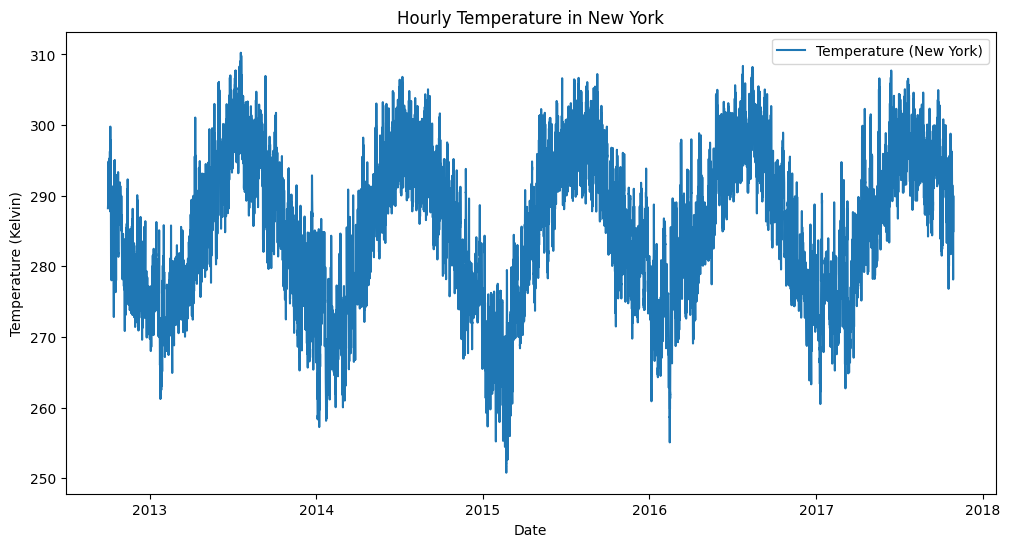

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(temperature_df['New York'], label='Temperature (New York)')
plt.title('Hourly Temperature in New York')
plt.xlabel('Date')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

In [4]:
missing_values = temperature_df.isnull().sum()
print(missing_values)

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64


In [5]:
temperature_df.fillna(method='ffill', inplace=True)

In [6]:
temperature_df['hour'] = temperature_df.index.hour
temperature_df['day_of_week'] = temperature_df.index.dayofweek

# Display the dataframe with new features
print(temperature_df[['hour', 'day_of_week']].head())

                     hour  day_of_week
datetime                              
2012-10-01 12:00:00    12            0
2012-10-01 13:00:00    13            0
2012-10-01 14:00:00    14            0
2012-10-01 15:00:00    15            0
2012-10-01 16:00:00    16            0


In [7]:
# Checking for missing values if any
missing_values = temperature_df.isnull().sum()
print(missing_values)

# Forward and backward filling all missing values again
temperature_df.fillna(method='ffill', inplace=True)
temperature_df.fillna(method='bfill', inplace=True)

# Ensure no NaN values remain
assert not temperature_df.isnull().any().any(), "There are still NaN values in the DataFrame."

Vancouver            1
Portland             1
San Francisco        1
Seattle              1
Los Angeles          1
San Diego            1
Las Vegas            1
Phoenix              1
Albuquerque          1
Denver               1
San Antonio          1
Dallas               1
Houston              1
Kansas City          1
Minneapolis          1
Saint Louis          1
Chicago              1
Nashville            1
Indianapolis         1
Atlanta              1
Detroit              1
Jacksonville         1
Charlotte            1
Miami                1
Pittsburgh           1
Toronto              1
Philadelphia         1
New York             1
Montreal             1
Boston               1
Beersheba            1
Tel Aviv District    1
Eilat                0
Haifa                1
Nahariyya            1
Jerusalem            1
hour                 0
day_of_week          0
dtype: int64


In [8]:
# Selecting target variable
target_city = 'New York'
temperature = temperature_df[[target_city]].values

# Normalizing features
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature)

In [9]:
train_size = int(len(temperature_scaled) * 0.8)
test_size = len(temperature_scaled) - train_size
train, test = temperature_scaled[0:train_size,:], temperature_scaled[train_size:len(temperature_scaled),:]

In [10]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 24
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Input will be: [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

In [14]:


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, num_layers, output_size):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        lstm_out_last_step = lstm_out[:, -1, :]
        predictions = self.linear(lstm_out_last_step)
        return predictions

input_size = 1
hidden_layer_size = 50
num_layers = 1
output_size = 1

model = LSTMModel(input_size, hidden_layer_size, num_layers, output_size)

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [16]:


X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.Tensor(Y_train).view(-1, 1)

train_data = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)

In [17]:
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for i in range(epochs):
    for seq, labels in train_loader:
        seq, labels = seq.to(device), labels.to(device)
        optimizer.zero_grad()
        y_pred = model(seq)
        single_loss = criterion(y_pred, labels)
        single_loss.backward()

        # Gradient clipping
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

        optimizer.step()

    if i % 25 == 0:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {epochs:3} loss: {single_loss.item():10.10f}')


epoch:   0 loss: 0.00371620
epoch:  25 loss: 0.00014488
epoch:  50 loss: 0.00016040
epoch:  75 loss: 0.00027371
epoch: 100 loss: 0.0002543789


In [18]:
X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.Tensor(Y_test).view(-1, 1)

# Create DataLoader for testing data
test_data = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False, drop_last=True)

In [19]:


actuals = np.array([label.item() for label in Y_test_tensor])
predictions = []

model.eval()
with torch.no_grad():
    for seq, labels in test_loader:
        seq = seq.to(device)
        y_pred = model(seq).cpu().numpy()
        predictions.append(y_pred[0][0])

predictions = np.array(predictions)

# Calculate descriptive statistics
mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 0.0074
Root Mean Squared Error (RMSE): 0.0102
Mean Absolute Percentage Error (MAPE): 1.33%


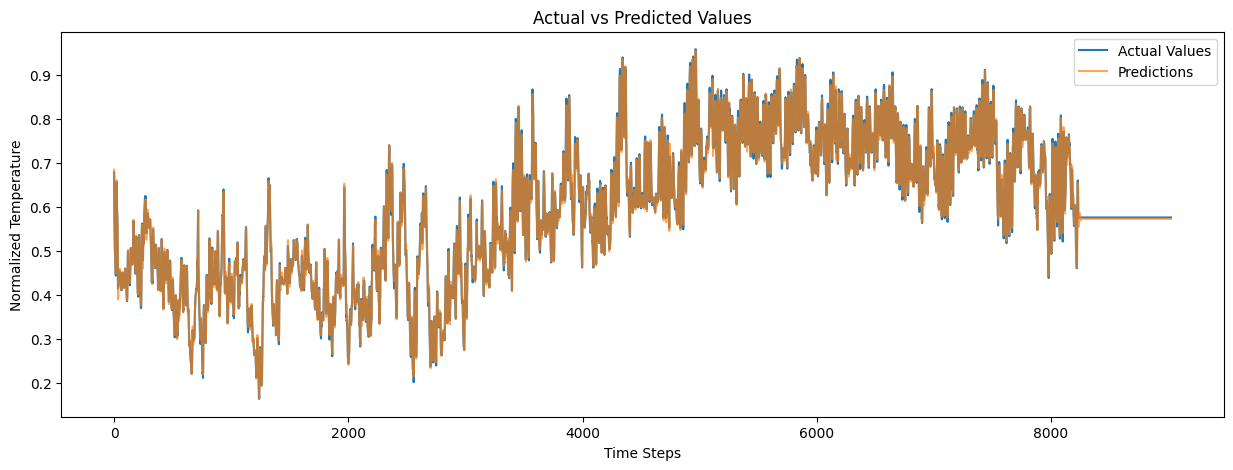

In [20]:
# Visualize predictions vs actuals
plt.figure(figsize=(15, 5))
plt.plot(actuals, label='Actual Values')
plt.plot(predictions, label='Predictions', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Temperature')
plt.legend()
plt.show()

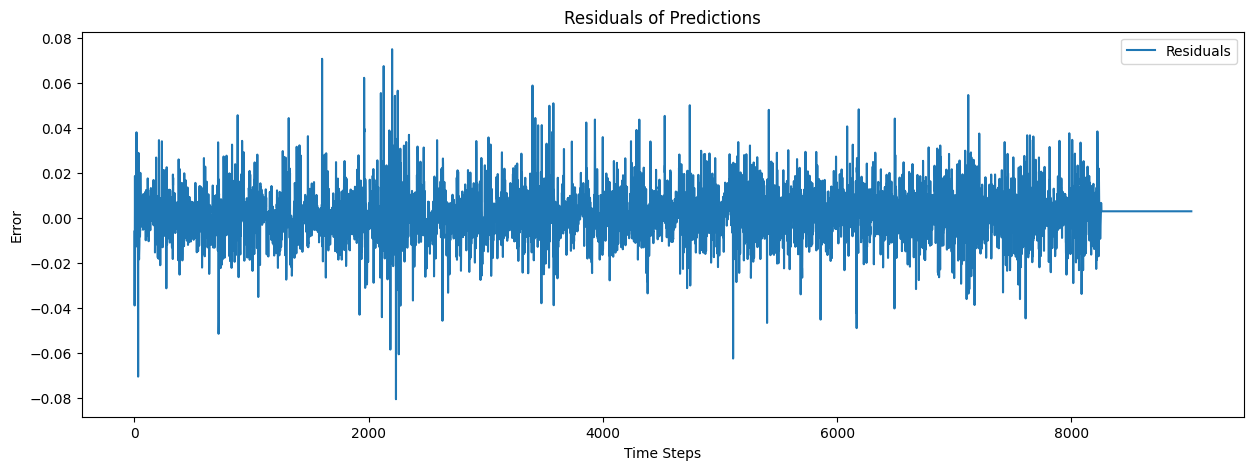

In [21]:
# Plot residuals
residuals = actuals - predictions
plt.figure(figsize=(15, 5))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.legend()
plt.show()

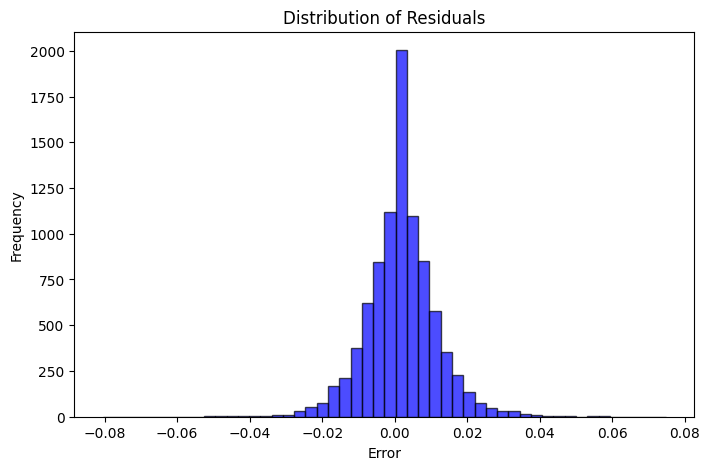

In [22]:
# Histogram of the residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()